An insurance company wants to know the medical charges of patients (customers). Based on historical data, predictions will be made based on features provided in the data. This project will  start by importing necessary libraries and packages that will aid in exporting data, extracting statistical insight from the data, visualising the data and also help in buildin machine learning models that will help in predictions.
Exploratory Data Analysis will be done to further understand how the various characteristics of the data relate

### Importing libraries and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [2]:
pi = pd.read_csv('insurance.csv')    # pi  stands for patience insurance

In [3]:
pi.head()   # Displaying first five rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
pi.isnull().sum()    # Displaying the number of missing values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Displaying the number of missing values in each column. From the display above, it can be seen that there are no missing values in the data.


In [5]:
pi.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


info() method is a very important part of the data preparation process. It displays the columns, the number of null values in the columns and also the data types of each column. One interesting thing about this method is that, in most cases for example a column like age which is a numerical column might be represented by Dtype 'object'. This is more reason to look into the data to find out why. Most a times it will be because theres a stray character or a string present in the observations of the feature or column.
Fortunately that is not the case here.

In [6]:
pi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This describes numerical data by showing the mean, standard deviation, maximum and minimum values etc....

In [7]:
pi.describe(include ='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Including object in the describe function displays describes observations in categorical features

## Exploratory Analysis

<AxesSubplot:xlabel='charges'>

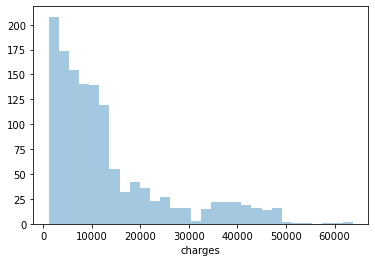

In [8]:
# checking the distribution of charges

sns.distplot(pi['charges'], kde = False)





from the above distribution plot it can be infered that the data is scewed to the right.
lets see how this can be changed by making it more of a bell shaped curve using log transformation

<AxesSubplot:xlabel='charges'>

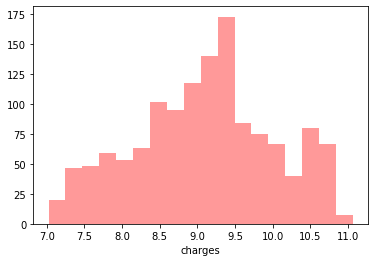

In [9]:
log_pi = np.log(pi['charges'])
sns.distplot(log_pi, kde = False, color = 'red')

Charges distribution looks better now

<AxesSubplot:xlabel='age'>

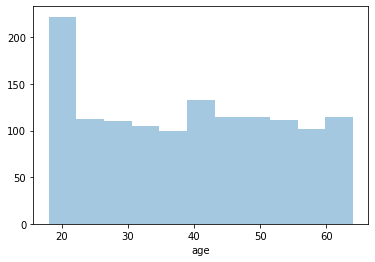

In [10]:
sns.distplot(pi['age'], kde = False)

<AxesSubplot:xlabel='bmi'>

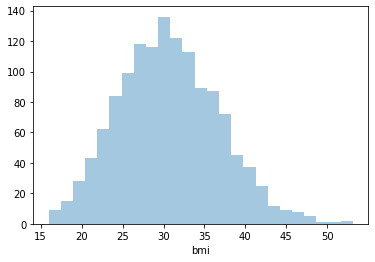

In [11]:
sns.distplot(pi['bmi'], kde = False)

Now this looks more of a normal distribution than the first plot.



In [12]:
# Making age a categorical variable
pi['age'].sample(20)

709     36
88      46
879     37
1207    36
97      55
998     33
498     44
292     25
111     55
575     58
567     41
3       33
899     19
115     60
539     53
463     56
1329    52
505     37
481     49
865     40
Name: age, dtype: int64

In [13]:
pi['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

from age 18 - 35 will be grouped as young adults


from age 36- 55 will grouped as senior adults


from age 56 and above will be grouped as elder

Looking at the number of unique observations for the ages column. it will be complicated to represent each point on an axis. Therefore it will be categorized into 3 different categories.

In [14]:
# creating a new feature: age_cat
pi['age_cat'] = np.nan
lst = [pi]
for ages in lst:
    ages.loc[(ages['age'] >= 18) & (ages['age'] <= 35), 'age_cat'] = 'Young Adult'
    ages.loc[(ages['age'] > 35) & (ages['age'] <= 55), 'age_cat'] = 'Senior Adult'
    ages.loc[ages['age'] > 55, 'age_cat'] = 'Elder'

In [15]:
pi['age_cat']

0        Young Adult
1        Young Adult
2        Young Adult
3        Young Adult
4        Young Adult
            ...     
1333    Senior Adult
1334     Young Adult
1335     Young Adult
1336     Young Adult
1337           Elder
Name: age_cat, Length: 1338, dtype: object

In [16]:
pi.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


<AxesSubplot:title={'center':'AGE PROPORTION'}>

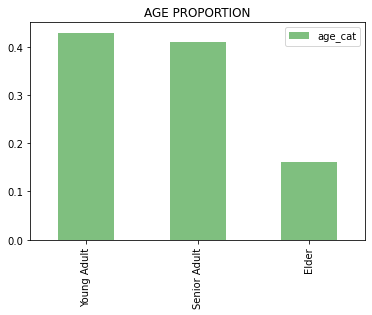

In [17]:
pi['age_cat'].value_counts(normalize = True).plot.bar(color = 'green', alpha = 0.5,
                                                      title = 'AGE PROPORTION',
                                                      legend = 'best')

From the above bar graph it can be infered that, Young Adults (43%), Senior Adults (41%) and Elder (16%)

In [18]:
minimum_bmi = pi['bmi'].min()
maximun_bmi = pi['bmi'].max()
print(minimum_bmi)
print(maximun_bmi)

15.96
53.13


In [19]:
pi['bmi_cat'] = np.nan
lst = [pi]
for bmis in lst:
    bmis.loc[(bmis['bmi'] < 18.5),'bmi_cat'] = 'Underweight'
    bmis.loc[(bmis['bmi'] >= 18.5) &  (bmis['bmi'] <= 24.9), 'bmi_cat'] = 'Healthy'
    bmis.loc[(bmis['bmi'] > 24.9) & (bmis['bmi'] < 30.0),'bmi_cat'] = 'Overweight'
    bmis.loc[(bmis['bmi'] >= 30.0),'bmi_cat'] = 'Obesse'

In [20]:
pi['bmi_cat'].unique()

array(['Overweight', 'Obesse', 'Healthy', 'Underweight'], dtype=object)

In [21]:
pi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_cat', 'bmi_cat'],
      dtype='object')

<AxesSubplot:title={'center':'BMI PROPORTIONS'}>

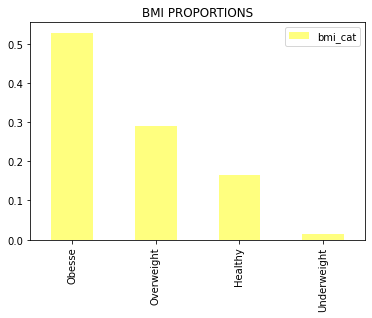

In [22]:
pi['bmi_cat'].value_counts(normalize = True).plot.bar(color = 'yellow', alpha = 0.5,
                                                      title = 'BMI PROPORTIONS',
                                                      legend = 'best')

It can be infered from the data that obese patients make more than 50% of the total number of patients. Representing the highest number of people in the dataset. While underweigth people represent less than 10% of the the total population of the dataset.

### Obtaining the correlation between numerical variables

In [23]:
numerical_variables = pi.select_dtypes(include = np.number)

In [24]:
cor = numerical_variables.corr().abs()

In [25]:
cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

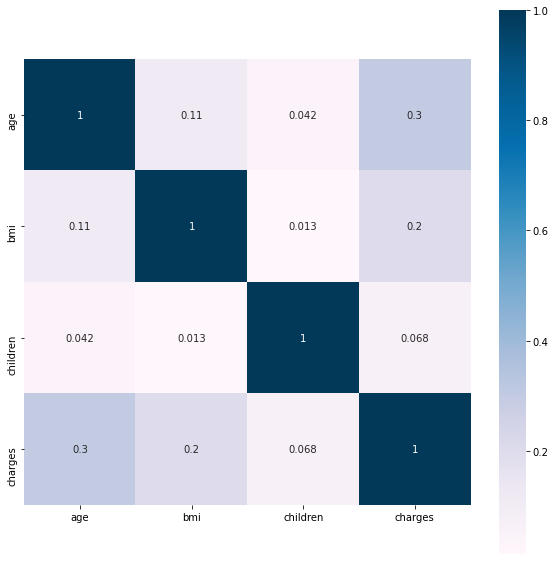

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(cor, vmax = 1, square = True, cmap = 'PuBu', annot = True)

Correlation states how the features are related to each other or the target variable
The most correlation is between charges and age with regards the heatmap above.
A correlation of 0.3 is not very significant.

In [27]:
pi['smoker'].sample(10)

282      no
683      no
906      no
99      yes
597      no
79       no
1146    yes
646      no
1207    yes
1267    yes
Name: smoker, dtype: object

<AxesSubplot:title={'center':'Smoker by proportion'}>

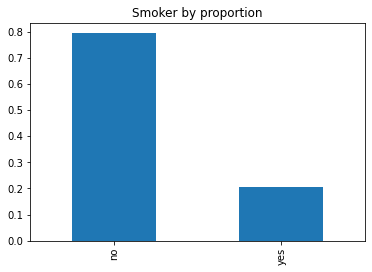

In [28]:
pi['smoker'].value_counts(normalize = True).plot.bar(title = 'Smoker by proportion')

From the above plot, about 80% of the patients are non-smokers and about 20% are smokers

Text(0.5, 1.0, 'Age over charges')

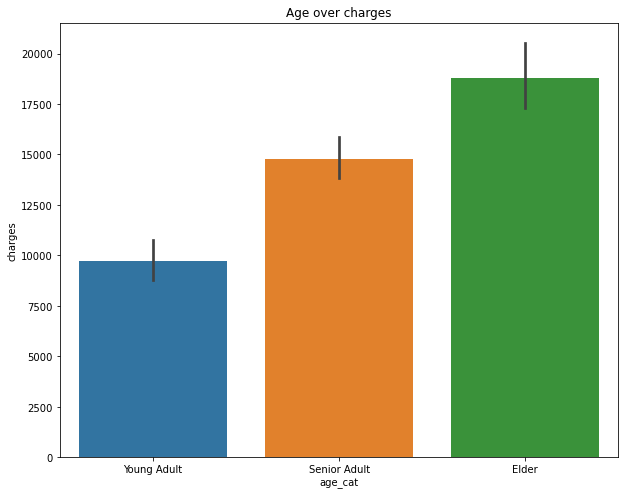

In [29]:
plt.figure(figsize=(10, 8))
sns.barplot(x='age_cat',y='charges',data=pi, orient = 'v')
plt.title('Age over charges')

From the data, young adults thus patients whose ages are from 18 - 35 were charged less compared to senior adults and elders. 
Comparing Senior Adults to Elders. It can be seen that Elders were charged more than senior adults.

From the above plot, it can be seen that people who smoked had higher charges than non-smokers

Text(0.5, 1.0, 'Age over bmi')

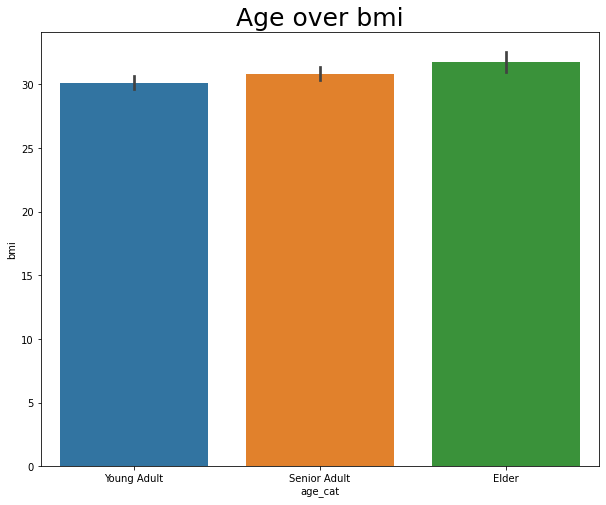

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x='age_cat',y='bmi',data=pi, orient = 'v')

plt.title('Age over bmi', fontsize = 25)

There is not much difference in the bmis with regards to the different age groups.
But Elders have slightly bmis than senior adults and young adults


### Who got charged more on average

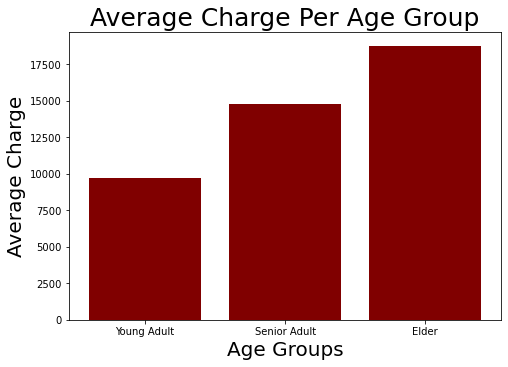

In [31]:
# average charge by age group
avg_ya = pi['charges'].loc[pi['age_cat']=='Young Adult'].mean()
avg_sa = pi['charges'].loc[pi['age_cat']=='Senior Adult'].mean()
avg_eld = pi['charges'].loc[pi['age_cat']=='Elder'].mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
average_charge = [avg_ya,avg_sa,avg_eld]
age_groups = ['Young Adult','Senior Adult','Elder']

ax.bar(age_groups,average_charge, color = 'maroon')
plt.xlabel('Age Groups', fontsize = 20)
plt.ylabel('Average Charge', fontsize = 20)
plt.title('Average Charge Per Age Group',fontsize = 25)
plt.show()


it can be infered from the above bar graph that elders where charged more on the average.
Exact figures will be displayed below

In [32]:
print('Average charges for young adults:{:.2f}'.format(avg_ya))
print('Average charges for senior adults:{:.2f}'.format(avg_sa))
print('Average charges for edlers: {:.2f}'.format(avg_eld))

Average charges for young adults:9744.48
Average charges for senior adults:14785.69
Average charges for edlers: 18795.99


In [33]:
pi.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obesse
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obesse
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


<AxesSubplot:xlabel='age', ylabel='charges'>

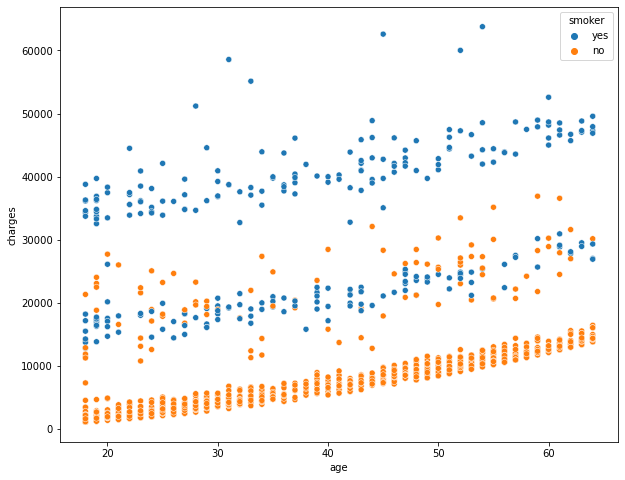

In [34]:
plt.figure(figsize = (10,8))
sns.scatterplot(pi.age,pi.charges, hue = pi.smoker, data = pi)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

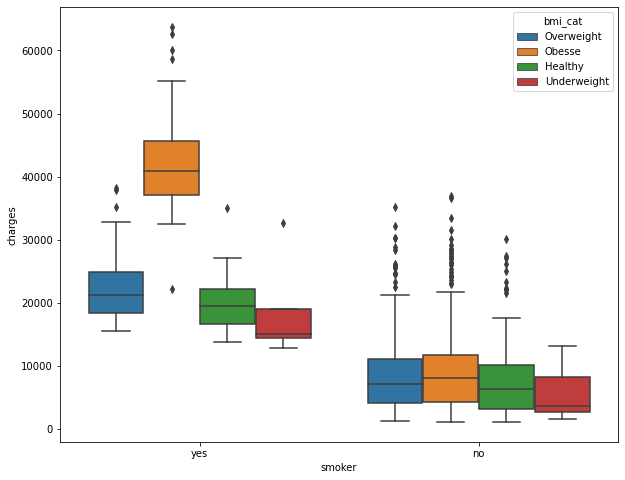

In [35]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'smoker', y = 'charges', data = pi, orient = 'v', hue= pi['bmi_cat'])

From the box plot, obese smokers are charged more than obese non smokers. Also, smokers in general are charged more than non smokers. From the smokers point of view, it can be seen that obese patients are charged more followed by overweight, healthy and underweight in that order. Same goes for the non-smokers

Text(0.5, 1.0, 'BMI')

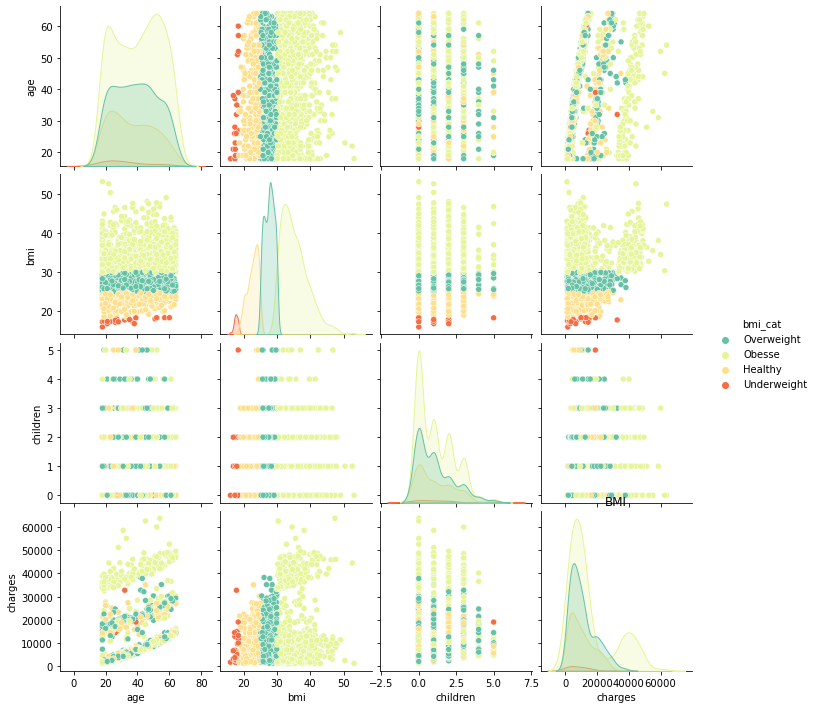

In [36]:
#sns.set(style = "ticks")
sns.pairplot(pi, hue="bmi_cat", palette='Spectral_r')
plt.title("BMI")

Text(0.5, 1.0, 'smokers and charges')

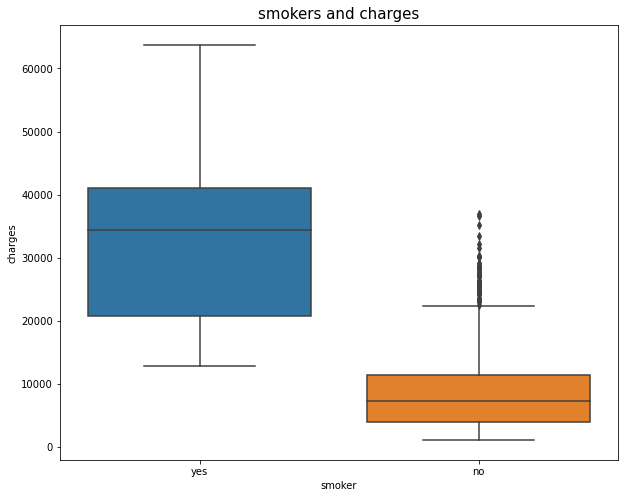

In [37]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='smoker',y='charges',data=pi, orient = 'v')
plt.title('smokers and charges',fontsize = 15)

From the boxplot above it can be seen that smokers were charged more than non-smokers

In [38]:
# AVERAGE CHARGES PER REGION
pi['region'].sample(15)

760     northeast
1269    southwest
645     northeast
115     northeast
1172    southeast
769     northwest
770     southwest
1074    northeast
1015    northwest
1193    northwest
873     southwest
599     northwest
584     southwest
69      southeast
1300    southeast
Name: region, dtype: object

In [39]:
#northwest, northeast, southeast, southwest

ave_nw = pi['charges'].loc[pi['region']=='northwest'].mean()
ave_ne = pi['charges'].loc[pi['region']=='northeast'].mean()
ave_sw = pi['charges'].loc[pi['region']== 'southwest'].mean()
ave_se = pi['charges'].loc[pi['region']=='southeast'].mean()

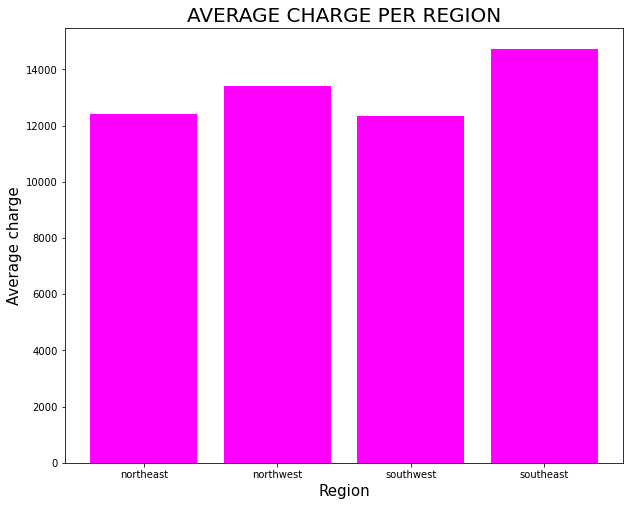

In [40]:
plt.figure(figsize = (10,8))

average_charge = [ave_nw,ave_ne,ave_sw,ave_se]
region = ['northeast','northwest','southwest','southeast']

plt.bar(region,average_charge,color= 'magenta')
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Average charge',fontsize = 15)
plt.title('AVERAGE CHARGE PER REGION',fontsize = 20)
plt.show()

In [41]:
print('Average charges for northeast:{:.2f}'.format(ave_ne))
print('Average charges for northwest:{:.2f}'.format(ave_nw))
print('Average charges for southwest: {:.2f}'.format(ave_sw))
print('Average charges for southeast: {:.2f}'.format(ave_se))

Average charges for northeast:13406.38
Average charges for northwest:12417.58
Average charges for southwest: 12346.94
Average charges for southeast: 14735.41


Patients from the southeast were charged more than patients from other regions

The age_cat and bmi_cat column will be dropped. Was only created to help in the analysis.



In [42]:
pi.drop('age_cat',axis = 1, inplace = True)

In [43]:
pi.drop('bmi_cat', axis = 1, inplace =True)

In [44]:
pi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Encoding Categorical Variables
Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step,


Categorical variables in this case are;
1. SEX
2. SMOKER
3. REGION


In [45]:
pi['sex'].replace(['male','female'],[0,1], inplace = True)  # 0 for males and 1 for females

In [46]:
pi['smoker'].replace(['yes','no'],[0,1], inplace = True)

In [47]:
pi['region'].replace(['southwest','southeast','northwest','northeast'],[0,1,2,3], inplace = True)

In [48]:
pi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


### Seperating the dependent variable from the independent variables

In [49]:
X = pi.drop('charges',axis = 1)
y = pi['charges']

In [50]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2


In [51]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Scaling the independent variables
Feature scaling is a method used to normalize the range of independent variables or features of data

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_data = scaler.fit_transform(X)
X = pd.DataFrame(norm_data, columns = X.columns)

In [53]:
X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,-1.970587,-1.343905
1,-1.509965,-0.989591,0.509621,-0.078767,0.507463,-0.438495
2,-0.797954,-0.989591,0.383307,1.580926,0.507463,-0.438495
3,-0.441948,-0.989591,-1.305531,-0.908614,0.507463,0.466915
4,-0.513149,-0.989591,-0.292556,-0.908614,0.507463,0.466915


In [54]:
print('shape of X:',X.shape)
print('shape of y:',y.shape)

shape of X: (1338, 6)
shape of y: (1338,)


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn.metrics import r2_score

In [58]:
X = np.array(X)
y = np.array(y)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [60]:
X_train

array([[ 1.69408811, -0.98959079,  0.12821768, -0.90861367,  0.5074631 ,
         1.37232554],
       [ 0.69727145,  1.0105187 , -1.11852037,  1.58092576, -1.97058663,
         1.37232554],
       [-1.1539595 ,  1.0105187 ,  0.34721706,  0.75107928, -1.97058663,
        -0.43849455],
       ...,
       [-0.58434998,  1.0105187 , -1.15871127,  0.75107928,  0.5074631 ,
        -1.34390459],
       [ 0.12766192,  1.0105187 ,  0.88856385, -0.07876719,  0.5074631 ,
        -0.43849455],
       [-0.22834403, -0.98959079, -0.15803994, -0.90861367,  0.5074631 ,
        -0.43849455]])

In [61]:
lr = LinearRegression()
lr.fit(X_train,y_train)
#prediction = lr.predict(X_test)

LinearRegression()

In [62]:
print ('Coefficients: ', lr.coef_)

Coefficients:  [ 3473.06523672   -12.65215202  1838.61402799   635.72615219
 -9687.13671541   318.42864919]


regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [63]:
prediction = lr.predict(X_test)

In [69]:
print(prediction)

[ 6.15980263e+03  2.53637721e+04  1.14837302e+04  8.15953499e+03
  5.76846368e+03  2.62896822e+03  4.02143298e+04  6.76820320e+03
  3.33685658e+03  4.78350910e+03  1.18096809e+03  1.32459145e+04
  7.63705234e+03  6.33528944e+03  9.37415772e+03  4.59262849e+03
  1.34878931e+02  1.24628406e+04  3.31325238e+03  1.18475507e+04
  3.82150408e+03  1.59070214e+03  1.45308541e+04 -1.32189164e+03
  3.27583903e+03  1.24640410e+04  3.00592305e+04  8.45547018e+03
  9.31781438e+03  1.13465748e+04  2.73480495e+04  5.22691508e+03
  4.19566440e+03  3.88522291e+04  2.84242962e+03  1.28553124e+04
  1.10874313e+04  3.98016779e+03  3.37843853e+03  1.00753781e+04
  1.00347768e+04  5.61953712e+03  9.01616895e+03  5.57750276e+03
  3.07682404e+03  3.86968161e+04  1.61983751e+04  1.15565204e+04
  1.59054465e+04  7.62901257e+03  6.68062809e+03  2.85779259e+04
  1.13777741e+04  1.66048543e+04  2.72779169e+04  1.09143580e+04
  6.69078198e+03  2.73027425e+04  7.53165905e+03  9.82139032e+03
  2.55853285e+03  1.23641

In [71]:
print(y_test)

[ 3925.7582  14571.8908  12222.8983   6799.458    3877.30425  2137.6536
 48970.2476   4433.3877   4544.2348   6640.54485  2913.569   20630.28351
  6067.12675  7526.70645 17929.30337  1532.4697   1121.8739  26392.26029
  2205.9808   8671.19125  1980.07     1708.92575 15019.76005  1728.897
  4906.40965 10370.91255 20234.85475  6748.5912   6571.544   14449.8544
 34439.8559   2416.955    4032.2407  46130.5265   2128.43105  8978.1851
 25992.82104 21984.47061  1261.442   10355.641   12029.2867   3227.1211
  6796.86325  3956.07145 23082.95533 47291.055   11576.13     9630.397
 36580.28216  6203.90175  2755.02095 35585.576    8556.907   14410.9321
 32734.1863  20878.78443  5325.651   33750.2918   8605.3615   6196.448
  2155.6815  25333.33284 14988.432   25678.77845  4762.329   42111.6647
 30942.1918   7954.517    4463.2051  33475.81715 11520.09985 18767.7377
  2789.0574   7441.501   14474.675    3443.064    8062.764   33471.97189
 11512.405   19594.80965 13143.86485  1815.8759   8334.45755  24

In [70]:
print('Residual Sum of errors: %2f'
     % np.mean((y_test-prediction)**2))


#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))

Residual Sum of errors: 36756233.932493
Variance score: 0.77


In [67]:
from sklearn.metrics import explained_variance_score

In [74]:
evs = explained_variance_score(y_test, prediction,multioutput='uniform_average')
print("explained variance score: %.2f" % evs)

explained variance score: 0.77


The explained variance is the difference between the expected value and the predicted value. it is the proportion of the variability of the difference between the actual samples of the dataset and the predictions made by the model.
Using regression analysis, it was possible to set up a predictive model using the independent variables provided in the dataset to explain 78% of the variance of the patient charges.